# Ising model hamiltonian 

Step 1: Generating the weights (summation over the pseudo-spin along the stacking chain) for interaction coefficients J0, J1, J2, J3, K, K', L, where K' = 1/2(coefficient[2,3]+coefficient[1,3]).
List the pseudo-spin for a polytype, 1 for face-sharing octahedra pair, -1 for corner sharing octahedra pair.

In [4]:
spin2H = [1,1]
spin3C = [-1,-1,-1]
spin4H = [1,-1,1,-1]
spin6H = [1,-1,-1,1,-1,-1]
spin9R = [1,1,-1,1,1,-1,1,1,-1]
spin12R = [1,1,-1,-1,1,1,-1,-1,1,1,-1,-1]
spin12H = [1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1]
spin2C9H11 = [1,1,1,1,1,1,1,1,-1,-1,-1]
spin2H9C11 = [1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
spin2C9H18 = [1,1,1,1,1,1,1,-1,-1,1,1,1,1,1,1,1,-1,-1]
spin2H9C18 = [1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1]


def coefficients(spin,nnn):
    length = len(spin)
    temp = 0
    for i in range(length):
        j = (i+nnn) % length
        temp += spin[i] * spin[j]
    print(temp)

def generalCoefficients(spin,nnn):
    length = len(spin)
    temp = 0
    for i in range(length):
        tempi = spin[i]
        for j in range(len(nnn)):
            if nnn == [0]:
                tempi = tempi
            else:
                k = (i+nnn[j]) % length
                tempi = tempi * spin[k]
        temp += tempi
    print(temp)

def getAll(spin):
    generalCoefficients(spin,[0])
    generalCoefficients(spin,[1])
    generalCoefficients(spin,[2])
    generalCoefficients(spin,[3])
    generalCoefficients(spin,[1,2])
    generalCoefficients(spin,[2,3])
    generalCoefficients(spin,[1,3])
    generalCoefficients(spin,[1,2,3])

getAll(spin2H)
#getAll(spin3C)
#getAll(spin4H)
#getAll(spin6H)
#getAll(spin9R)
#getAll(spin12R)
#getAll(spin12H)
#getAll(spin2H9C11)
#getAll(spin2C9H11)
#getAll(spin2H9C18)
#getAll(spin2C9H18)
#the K' = 1/2([2,3]+[1,3])

2
2
2
2
2
2
2
2


Step 2: with DFT calculated total energies for several polytypes, the values of the interaction coefficients are numerially fitted.

In [3]:
import numpy as np
MAT = np.array([[2,2,2,2,2,2,2,2], #2H
                [3,-3,3,3,3,-3,-3,3],#3C
                [4,0,-4,4,-4,0,0,4],#4H
                [6,-2,-2,-2,6,6,-2,-2],#6H
                [9,3,-3,-3,9,-9,3,-3],#9R
                [12,0,0,-12,0,0,0,12],#12R
                [12,-8,4,4,4,0,0,-4],#12H
               ])

ENG = [-24.651502, -36.707196, -49.048539, -73.554815, -110.63025, -147.36321, -146.929]  #CsPbI3

#ENG = [-28.057165, -42.207545, -56.101650, -84.211709, -126.20073, -168.32148, -168.60493] #CsPbBr3



print(MAT)
print(ENG)

J, residuals, rank, s = np.linalg.lstsq(MAT,ENG,rcond=None)
#J = np.linalg.solve(MAT,ENG)
print(J)
#print(residuals)

[[  2   2   2   2   2   2   2   2]
 [  3  -3   3   3   3  -3  -3   3]
 [  4   0  -4   4  -4   0   0   4]
 [  6  -2  -2  -2   6   6  -2  -2]
 [  9   3  -3  -3   9  -9   3  -3]
 [ 12   0   0 -12   0   0   0  12]
 [ 12  -8   4   4   4   0   0  -4]]
[-24.651502, -36.707196, -49.048539, -73.554815, -110.63025, -147.36321, -146.929]
[-1.12432698e+01  2.01506745e+00  1.02438188e+00  4.41468750e-03
 -1.03368526e+00  1.16543750e-03 -2.06124239e+00 -1.03258301e+00]


# Genetic algorithm with the model hamiltonian as the optimisation function

In [7]:
pip install func-timeout

     |████████████████████████████████| 44 kB 723 kB/s eta 0:00:01
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=ce395887227d0057a77867b8b14ab960cae5575e11abf6df6071fa30fa80d5a4
  Stored in directory: /Users/zhenzhu/Library/Caches/pip/wheels/a8/92/ca/5bbab358275e310af23b73fc32ebf37d6a7a08c87c8d2cdbc1
Successfully built func-timeout
Note: you may need to restart the kernel to use updated packages.


# The following code contains two parts: the main genetic algorithm and the optimisation function. 

Important parameters: 
algorithm_param = {'max_num_iteration': 100,\
                   'population_size':300,\
                   'mutation_probability':0.6,\
                   'elit_ratio': 0.2,\
                   'crossover_probability': 0.1,\
                   'parents_portion': 0.6,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None} #in the genetic algorithm function, tuning the performance of the genetic algorithm.
                   
layer = 12 # in the optimisation function, defines the layer number, can be any integer of interest

return toten #in the optimisation function, finding the low energy structures

return -toten #in the optimisation function, finding the symmetry forbidden sequences


 The best solution found:                                                                           
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

 Objective function:
 -147.90901204800002


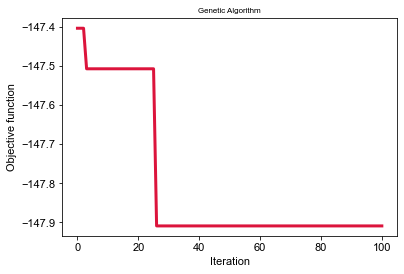

Time:  3.3149929739997788


In [15]:
###############################################################################
############################GA GA GA GA GA #############################
###############################################################################

import numpy as np
import sys
import time
from func_timeout import func_timeout, FunctionTimedOut
import matplotlib.pyplot as plt
import timeit


class geneticalgorithm():
    
    '''  Genetic Algorithm (Elitist version) for Python
    
    An implementation of elitist genetic algorithm for solving problems with
    continuous, integers, or mixed variables.
    
    
    
    Implementation and output:
        
        methods:
                run(): implements the genetic algorithm
                
        outputs:
                output_dict:  a dictionary including the best set of variables
            found and the value of the given function associated to it.
            {'variable': , 'function': }
            
                report: a list including the record of the progress of the
                algorithm over iterations

    '''
    #############################################################
    def __init__(self, function, dimension, variable_type='bool', \
                 variable_boundaries=None,\
                 variable_type_mixed=None, \
                 function_timeout=10,\
                 algorithm_parameters={'max_num_iteration': None,\
                                       'population_size':100,\
                                       'mutation_probability':0.1,\
                                       'elit_ratio': 0.01,\
                                       'crossover_probability': 0.5,\
                                       'parents_portion': 0.3,\
                                       'crossover_type':'uniform',\
                                       'max_iteration_without_improv':None}):


        '''
        @param function <Callable> - the given objective function to be minimized
        NOTE: This implementation minimizes the given objective function. 
        (For maximization multiply function by a negative sign: the absolute 
        value of the output would be the actual objective function)
        
        @param dimension <integer> - the number of decision variables
        
        @param variable_type <string> - 'bool' if all variables are Boolean; 
        'int' if all variables are integer; and 'real' if all variables are
        real value or continuous (for mixed type see @param variable_type_mixed)
        
        @param variable_boundaries <numpy array/None> - Default None; leave it 
        None if variable_type is 'bool'; otherwise provide an array of tuples 
        of length two as boundaries for each variable; 
        the length of the array must be equal dimension. For example, 
        np.array([0,100],[0,200]) determines lower boundary 0 and upper boundary 100 for first 
        and upper boundary 200 for second variable where dimension is 2.
        
        @param variable_type_mixed <numpy array/None> - Default None; leave it 
        None if all variables have the same type; otherwise this can be used to
        specify the type of each variable separately. For example if the first 
        variable is integer but the second one is real the input is: 
        np.array(['int'],['real']). NOTE: it does not accept 'bool'. If variable
        type is Boolean use 'int' and provide a boundary as [0,1] 
        in variable_boundaries. Also if variable_type_mixed is applied, 
        variable_boundaries has to be defined.
        
        @param function_timeout <float> - if the given function does not provide 
        output before function_timeout (unit is seconds) the algorithm raise error.
        For example, when there is an infinite loop in the given function. 
        
        @param algorithm_parameters:
            @ max_num_iteration <int> - stoping criteria of the genetic algorithm (GA)
            @ population_size <int> 
            @ mutation_probability <float in [0,1]>
            @ elit_ration <float in [0,1]>
            @ crossover_probability <float in [0,1]>
            @ parents_portion <float in [0,1]>
            @ crossover_type <string> - Default is 'uniform'; 'one_point' or 
            'two_point' are other options
            @ max_iteration_without_improv <int> - maximum number of 
            successive iterations without improvement. If None it is ineffective
        
        for more details and examples of implementation please visit:
            https://github.com/rmsolgi/geneticalgorithm
  
        '''
        self.__name__=geneticalgorithm
        #############################################################
        # input function
        assert (callable(function)),"function must be callable"     
        
        self.f=function
        #############################################################
        #dimension
        
        self.dim=int(dimension)
        
        #############################################################
        # input variable type
        
        assert(variable_type=='bool' or variable_type=='int' or\
               variable_type=='real'), \
               "\n variable_type must be 'bool', 'int', or 'real'"
       #############################################################
        # input variables' type (MIXED)     

        if variable_type_mixed is None:
            
            if variable_type=='real': 
                self.var_type=np.array([['real']]*self.dim)
            else:
                self.var_type=np.array([['int']]*self.dim)            

 
        else:
            assert (type(variable_type_mixed).__module__=='numpy'),\
            "\n variable_type must be numpy array"  
            assert (len(variable_type_mixed) == self.dim), \
            "\n variable_type must have a length equal dimension."       

            for i in variable_type_mixed:
                assert (i=='real' or i=='int'),\
                "\n variable_type_mixed is either 'int' or 'real' "+\
                "ex:['int','real','real']"+\
                "\n for 'boolean' use 'int' and specify boundary as [0,1]"
                

            self.var_type=variable_type_mixed
        #############################################################
        # input variables' boundaries 

            
        if variable_type!='bool' or type(variable_type_mixed).__module__=='numpy':
                       
            assert (type(variable_boundaries).__module__=='numpy'),\
            "\n variable_boundaries must be numpy array"
        
            assert (len(variable_boundaries)==self.dim),\
            "\n variable_boundaries must have a length equal dimension"        
        
        
            for i in variable_boundaries:
                assert (len(i) == 2), \
                "\n boundary for each variable must be a tuple of length two." 
                assert(i[0]<=i[1]),\
                "\n lower_boundaries must be smaller than upper_boundaries [lower,upper]"
            self.var_bound=variable_boundaries
        else:
            self.var_bound=np.array([[0,1]]*self.dim)
 
        ############################################################# 
        #Timeout
        self.funtimeout=float(function_timeout)
        
        ############################################################# 
        # input algorithm's parameters
        
        self.param=algorithm_parameters
        
        self.pop_s=int(self.param['population_size'])
        
        assert (self.param['parents_portion']<=1\
                and self.param['parents_portion']>=0),\
        "parents_portion must be in range [0,1]" 
        
        self.par_s=int(self.param['parents_portion']*self.pop_s)
        trl=self.pop_s-self.par_s
        if trl % 2 != 0:
            self.par_s+=1
               
        self.prob_mut=self.param['mutation_probability']
        
        assert (self.prob_mut<=1 and self.prob_mut>=0), \
        "mutation_probability must be in range [0,1]"
        
        
        self.prob_cross=self.param['crossover_probability']
        assert (self.prob_cross<=1 and self.prob_cross>=0), \
        "mutation_probability must be in range [0,1]"
        
        assert (self.param['elit_ratio']<=1 and self.param['elit_ratio']>=0),\
        "elit_ratio must be in range [0,1]"                
        
        trl=self.pop_s*self.param['elit_ratio']
        if trl<1 and self.param['elit_ratio']>0:
            self.num_elit=1
        else:
            self.num_elit=int(trl)
            
        assert(self.par_s>=self.num_elit), \
        "\n number of parents must be greater than number of elits"
        
        if self.param['max_num_iteration']==None:
            self.iterate=0
            for i in range (0,self.dim):
                if self.var_type[i]=='int':
                    self.iterate+=(self.var_bound[i][1]-self.var_bound[i][0])*self.dim*(100/self.pop_s)
                else:
                    self.iterate+=(self.var_bound[i][1]-self.var_bound[i][0])*50*(100/self.pop_s)
            self.iterate=int(self.iterate)
            if (self.iterate*self.pop_s)>10000000:
                self.iterate=10000000/self.pop_s
        else:
            self.iterate=int(self.param['max_num_iteration'])
        
        self.c_type=self.param['crossover_type']
        assert (self.c_type=='uniform' or self.c_type=='one_point' or\
                self.c_type=='two_point'),\
        "\n crossover_type must 'uniform', 'one_point', or 'two_point' Enter string" 
        
        
        self.stop_mniwi=False
        if self.param['max_iteration_without_improv']==None:
            self.mniwi=self.iterate+1
        else: 
            self.mniwi=int(self.param['max_iteration_without_improv'])

        
        ############################################################# 
    def run(self):
        
        
        ############################################################# 
        # Initial Population
        
        self.integers=np.where(self.var_type=='int')
        self.reals=np.where(self.var_type=='real')
        
        
        
        pop=np.array([np.ones(self.dim+1)]*self.pop_s)
        solo=np.ones(self.dim+1)
        var=np.ones(self.dim)       
        
        for p in range(0,self.pop_s):
         
            for i in self.integers[0]:
               #var[i]=np.random.randint(self.var_bound[i][0],\
                        #self.var_bound[i][1]+1)
                s = [-1, 1]
                var[i]=np.random.choice(s)  
                solo[i]=var[i].copy()
            for i in self.reals[0]:
                var[i]=self.var_bound[i][0]+np.random.random()*\
                (self.var_bound[i][1]-self.var_bound[i][0])    
                solo[i]=var[i].copy()
            
            obj=self.sim(var)
            solo[self.dim]=obj
            pop[p]=solo.copy()
            #print(pop[p])
        

        #############################################################

        #############################################################
        # Report
        self.report=[]
        self.test_obj=obj
        self.best_variable=var.copy()
        self.best_function=obj
        ##############################################################   
                        
        t=1
        counter=0
        while t<=self.iterate:
            
            
            self.progress(t,self.iterate,status="GA is running...")
            #############################################################
            #Sort
            pop = pop[pop[:,self.dim].argsort()]

                
            
            if pop[0,self.dim]<self.best_function:
                counter=0
                self.best_function=pop[0,self.dim].copy()
                self.best_variable=pop[0,: self.dim].copy()
            else:
                counter+=1
            #############################################################
            # Report

            self.report.append(pop[0,self.dim])
    
            ##############################################################         
            # Normalizing objective function 
            
            normobj=np.ones(self.pop_s)
            
            minobj=pop[0,self.dim]
            if minobj<0:
                normobj=pop[:,self.dim]+abs(minobj)
                
            else:
                normobj=pop[:,self.dim].copy()
    
            maxnorm=np.amax(normobj)
            normobj=maxnorm-normobj+1

            #############################################################        
            # Calculate probability
            
            sum_normobj=np.sum(normobj)
            prob=np.ones(self.pop_s)
            prob=normobj/sum_normobj
            cumprob=np.cumsum(prob)
            #print(cumprob)
  
            #############################################################        
            # Select parents
            par=np.array([np.ones(self.dim+1)]*self.par_s)
            
            for k in range(0,self.num_elit):
                par[k]=pop[k].copy()
                
            for k in range(self.num_elit,self.par_s):
                index=np.searchsorted(cumprob,np.random.random())
                par[k]=pop[index].copy()
                
            ef_par_list=np.array([False]*self.par_s)
            par_count=0
            while par_count==0:
                for k in range(0,self.par_s):
                    if np.random.random()<=self.prob_cross:
                        ef_par_list[k]=True
                        par_count+=1
                 
            ef_par=par[ef_par_list].copy()
    
            #############################################################  
            #New generation
            pop=np.array([np.ones(self.dim+1)]*self.pop_s)
            
            for k in range(0,self.par_s):
                pop[k]=par[k].copy()
                
            for k in range(self.par_s, self.pop_s, 2):
                r1=np.random.randint(0, par_count)
                r2=np.random.randint(0, par_count)
                pvar1=ef_par[r1,: self.dim].copy()
                pvar2=ef_par[r2,: self.dim].copy()
                
                ch=self.cross(pvar1,pvar2,self.c_type)
                ch1=ch[0].copy()
                ch2=ch[1].copy()
                
                ch1=self.mut(ch1)
                ch2=self.mutmidle(ch2,pvar1,pvar2)               
                solo[: self.dim]=ch1.copy()                
                obj=self.sim(ch1)
                solo[self.dim]=obj
                pop[k]=solo.copy()                
                solo[: self.dim]=ch2.copy()                
                obj=self.sim(ch2)               
                solo[self.dim]=obj
                pop[k+1]=solo.copy()
        #############################################################       
            t+=1
            if counter > self.mniwi:
                pop = pop[pop[:,self.dim].argsort()]
                if pop[0,self.dim]>=self.best_function:
                    t=self.iterate
                    self.progress(t,self.iterate,status="GA is running...")
                    time.sleep(2)
                    t+=1
                    self.stop_mniwi=True
                
        #############################################################
        #Sort
        pop = pop[pop[:,self.dim].argsort()]
        
        if pop[0,self.dim]<self.best_function:
                
            self.best_function=pop[0,self.dim].copy()
            self.best_variable=pop[0,: self.dim].copy()
        #############################################################
        # Report

        self.report.append(pop[0,self.dim])
        
        
 
        
        self.output_dict={'variable': self.best_variable, 'function':\
                          self.best_function}
        show=' '*100
        sys.stdout.write('\r%s' % (show))
        sys.stdout.write('\r The best solution found:\n %s' % (self.best_variable))
        sys.stdout.write('\n\n Objective function:\n %s\n' % (self.best_function))
        sys.stdout.flush() 
        re=np.array(self.report)
        #plt.plot(re, color="crimson", linewidth=3, marker='*', linestyle='--', markersize = 4, markeredgecolor = 'none',alpha=1)
        #plt.plot(re, color="crimson", marker='o', markersize = 3, markeredgecolor = 'none',alpha=0.5)
        plt.plot(re, color="crimson", linewidth=3,alpha=1)
        plt.xlabel('Iteration', fontname ='Arial',fontsize=11)
        plt.ylabel('Objective function', fontname ='Arial',fontsize=11)
        #plt.ylim([-147.95,-147.2])
        #plt.ylim([97,116])
        #plt.ylim(self.best_function-1, self.best_function+1)
        plt.title('Genetic Algorithm', fontname ='Arial',fontsize=8)
        plt.xticks(fontname = 'Arial',fontsize=11)
        plt.yticks(fontname = 'Arial',fontsize=11)
        figure =plt.gcf()
        figure.set_size_inches(6,4)
        #plt.savefig('/Users/lizhenzhu/Downloads/'+'ga_h1.png', dpi = 600, transparent=True)
        plt.show()
        if self.stop_mniwi==True:
            sys.stdout.write('\nWarning: GA is terminated due to the'+\
                             ' maximum number of iterations without improvement was met!')
##############################################################################         
##############################################################################         
    def cross(self,x,y,c_type):
         
        ofs1=x.copy()
        ofs2=y.copy()
        

        if c_type=='one_point':
            ran=np.random.randint(0,self.dim)
            for i in range(0,ran):
                ofs1[i]=y[i].copy()
                ofs2[i]=x[i].copy()
  
        if c_type=='two_point':
                
            ran1=np.random.randint(0,self.dim)
            ran2=np.random.randint(ran1,self.dim)
                
            for i in range(ran1,ran2):
                ofs1[i]=y[i].copy()
                ofs2[i]=x[i].copy()
            
        if c_type=='uniform':
                
            for i in range(0, self.dim):
                ran=np.random.random()
                if ran <0.5:
                    ofs1[i]=y[i].copy()
                    ofs2[i]=x[i].copy() 
                   
        return np.array([ofs1,ofs2])
###############################################################################  
    
    def mut(self,x):
        
        for i in self.integers[0]:
            ran=np.random.random()
            if ran < self.prob_mut:
                s = [-1, 1]
                x[i]=np.random.choice(s) 
                    
        

        for i in self.reals[0]:                
            ran=np.random.random()
            if ran < self.prob_mut:   

               x[i]=self.var_bound[i][0]+np.random.random()*\
                (self.var_bound[i][1]-self.var_bound[i][0])    
            
        return x
###############################################################################
    def mutmidle(self, x, p1, p2):
        for i in self.integers[0]:
            ran=np.random.random()
            if ran < self.prob_mut:
                if p1[i]<p2[i]:
                    s = [-1, 1]
                    x[i]=np.random.choice(s)
                elif p1[i]>p2[i]:
                    s = [-1, 1]
                    x[i]=np.random.choice(s)
                else:
                    s = [-1, 1]
                    x[i]=np.random.choice(s)
                        
        for i in self.reals[0]:                
            ran=np.random.random()
            if ran < self.prob_mut:   
                if p1[i]<p2[i]:
                    x[i]=p1[i]+np.random.random()*(p2[i]-p1[i])  
                elif p1[i]>p2[i]:
                    x[i]=p2[i]+np.random.random()*(p1[i]-p2[i])
                else:
                    x[i]=self.var_bound[i][0]+np.random.random()*\
                (self.var_bound[i][1]-self.var_bound[i][0]) 
        return x

###############################################################################    
    def sim(self,X):
        self.temp=X.copy()
        obj=self.f(self.temp)
        return obj

###############################################################################
    def progress(self, count, total, status=''):
        bar_len = 50
        filled_len = int(round(bar_len * count / float(total)))

        percents = round(100.0 * count / float(total), 1)
        bar = '|' * filled_len + '_' * (bar_len - filled_len)

        sys.stdout.write('\r%s %s%s %s' % (bar, percents, '%', status))
        sys.stdout.flush()     
###############################################################################            
###############################################################################
                        
###############################################################################
############################Optimisation function #############################
###############################################################################
    
import numpy as np
array_co =[]
layer = 12  # define the layer number of interested, this can be changed to any integer
def coefficients(spin,nnn):
    length = len(spin)
    temp = 0
    for i in range(length):
        j = (i+nnn) % length
        temp += spin[i] * spin[j]
    #print(temp)

def generalCoefficients(spin,nnn):
    length = len(spin)
    temp = 0
    for i in range(length):
        tempi = spin[i]
        for j in range(len(nnn)):
            if nnn == [0]:
                tempi = tempi
            else:
                k = (i+nnn[j]) % length
                tempi = tempi * spin[k]
        temp += tempi
    #print(temp)
    array_co.append(str(temp)+' ')
    #print(array_co)

def getAll(spin):
    generalCoefficients(spin,[0])
    generalCoefficients(spin,[1])
    generalCoefficients(spin,[2])
    generalCoefficients(spin,[3])
    generalCoefficients(spin,[1,2])
    generalCoefficients(spin,[2,3])
    generalCoefficients(spin,[1,3])
    generalCoefficients(spin,[1,2,3])

def f(spin):
        #print (spin[0] == 0)
    #if (spin[0] != 0) & (spin[1] != 0) & (spin[2] != 0) & (spin[3] != 0) & (spin[4] != 0) & (spin[5] != 0) & (spin[6] != 0) & (spin[7] != 0) & (spin[8] != 0) & (spin[9] != 0) & (spin[10] != 0) & (spin[11] != 0):
    getAll(spin)
    #print(array_co)
    co1 = layer*(-11.2432698)
    co2 = float(array_co[0])* (2.01506745)
    co3 = float(array_co[1])* (1.02438188)
    co4 = float(array_co[2])* (0.004414688)
    co5 = float(array_co[3])* (-1.03368526)
    co6 = float(array_co[4]) * (0.001165438)
    co7 = (1/2)*(float(array_co[6])+float(array_co[5])) * (-2.06124239)
    co8 = float(array_co[7])* (-1.03258301)
    #toten = co1 + co2 + co3 + co4 + co5 + co6+co7+co8
    del array_co[0]
    del array_co[0]
    del array_co[0]
    del array_co[0]
    del array_co[0]
    del array_co[0]
    del array_co[0]
    del array_co[0]
    #print(toten)
    toten = (co1 + co2 + co3 + co4 + co5 + co6+co7+co8)
    return toten                        #finding the low energy structures
    #return -toten                      #finding the symmetry forbidden sequences


varbound=np.array([[-1,1]]*layer)

algorithm_param = {'max_num_iteration': 100,\
                   'population_size':300,\
                   'mutation_probability':0.6,\
                   'elit_ratio': 0.2,\
                   'crossover_probability': 0.1,\
                   'parents_portion': 0.6,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=geneticalgorithm(function=f,\
            dimension=layer,\
            variable_type='int',\
            variable_boundaries=varbound,\
            function_timeout=10,\
            algorithm_parameters=algorithm_param)

start = timeit.default_timer()

model.run()

stop = timeit.default_timer()

print('Time: ', stop - start) 
